# <font color='#5493b7'><center><h1>The Titanic</h1></center></font>

In [11]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="titanic.jpg", width=1000)

In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# <font color='#5493b7'><center><h1>Describing, questioning and analyzing a disaster</h1><br /></center></font>
### <center><h2>Udacity - Data Analyst Nanodegree Program</h2></center>
### <center><h3>Aviad Giat - September 2017</h3></center>

<A NAME="Top"></A><font size="4.5"> In this document (titles are clickable):
1. <a href="#discovering">Discovering and wrangling the data</a><br />
2. <a href="#questions">Questions about the data</a><br />
3. [Analyzing the data](#analyzing)<br />
<BLOCKQUOTE>a. <a href="#class">Survivors by Class</a><br />
    b. <a href="#gender">Survivors by Gender</a><br />
    c. <a href="#age">Survivors by Age</a><br />
    d. <a href="#fare">Survivors by Fare</a><br /></BLOCKQUOTE>
4. [Summary](#conclusion)<br />
5. [Sources](#sources)

In [14]:
# If you use matplotlib plots and want to generate a PDF document, 
# it is useful to have the IPython backend generate high quality pdf 
# versions of plots using this code snippet:
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

In [15]:
# Import Libraries, upload and wrangler the data

# Libraries to import and use in this analysis
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

import scipy.stats as stats
import pylab as pl
import plotly.plotly as py
import seaborn as sns
import random
from pivottablejs import pivot_ui
from ipywidgets import interact

In [16]:
# Plot the matplotlib graphics inline
%matplotlib inline 

In [17]:
# Making the wrapper output look nicer when output is too long

In [18]:
%%html
<style>.output_wrapper, .output {height:auto !important; max-height:1000px;
                                }.output_scroll {box-shadow:none !important; webkit-box-shadow:none !important;}</style>

In [19]:
# Adding the option to scroll down in a slideshow mode

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'scroll': True,
})

{'height': 768, 'scroll': True, 'width': 1024}

In [73]:
# Load the data
statsi = pd.read_csv('titanic-data.csv')

# Open the Titanic dataset with Pandas
statsi = pd.read_csv('titanic-data.csv')

# Change columns' names
statsi.rename(columns={'Pclass': 'Class', 'Sex': 'Gender'}, inplace=True)   

# Change the "Fare" variable to an integer
statsi['Fare'] = statsi['Fare'].astype(int)   

# Fill the empty 'Age' column's cells with random numbers from 0 to 80 years old.
statsi['Age'] = statsi['Age'].apply(lambda x: random.random() * 80)

# Create a new columns 'Sex' as an integer
statsi['Sex'] = statsi['Gender'].map({'male': 0, 'female': 1})

# Narrow down the (variables) scope of this dataframe
statsi = statsi[['Survived', 'Class', 'Gender', 'Age', 'Fare', 'Sex']]

# Keep floating numbers with not more than 2 decimals
pd.set_option('display.precision', 2)

# Make sure there are no NULLS. Change False to True to see the result.
if False:
    print('\nMake sure there are no empty sells in the dataframe\n===================================================')
    print(statsi.notnull().sum())
    
#print('Basic statistics accross 5 variables')
# Add column with strings (Yes, No) drawing the data from the integer Survived column 
statsi['Survived_y_n'] = statsi['Survived'] # Create a new column 'Survived_y_n'
statsi['Survived_y_n'] = statsi['Survived_y_n'].map({0: 'No', 1:"Yes"}) # map the new column

## A sample of 5 records from the new dataframe (Pandas' dataset)

In [74]:
# Basic statistics accross the variables
statsi.head()

,Survived,Class,Gender,Age,Fare,Sex,Survived_y_n
0,0,3,male,79.48,7,0,No
1,1,1,female,11.37,71,1,Yes
2,1,3,female,24.08,7,1,Yes
3,1,1,female,73.14,53,1,Yes
4,0,3,male,77.10,8,0,No


In [24]:
# Print the first 5 lines of the new dataframe with Duplicated columns, 
# where 1 column represents the integer and one the string, for easier calculations.
#print("The new database's first rows\n==============================")
#print(statsi.head())

In [25]:
# Defining age ranges for the "Age" analysis further down in this document

# This function was dropped in favor of a better solution below.

# def age_range(age):
#     if age < 10:
#         return '01'
#     elif age > 10 and age < 20:
#         return '10'
#     elif age > 20 and age < 30:
#         return '20'
#     elif age > 30 and age < 40:
#         return '30'
#     elif age > 40 and age < 50:
#         return '40'
#     elif age > 50 and age < 60:
#         return '50'
#     elif age > 60 and age < 70:
#         return '60'
#     elif age > 70:
#         return '70'
#     else:
#         return
#     return


# Add a new column with age ranges in decades to to each row.
# statsi['Ages'] = statsi['Age'].apply(age_range)

In [26]:
# (A more efficient way to achieve the above function's functionality):
# Add a new column with age ranges in decades to each row using the Pandas function cut()
statsi['Ages'] = pd.cut(statsi['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
                        labels=["0-10","10-20","20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

## Description of the variables in this analysis

Survived &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Passenger's survival as an integer (0 = No, 1 = Yes)<br />
Survived_y_n &nbsp; Passenger's survival as a string (yes, No)<br />
Class &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Passenger's Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br />
Gender &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Passenger's gender (Male/Female)<br />
Sex &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Passenger's gender (0 = Male; 1 = Female)<br />
Age &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Passenger's Age<br />
Ages &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Passenger's Age group by decades (0-10 = 01, 10-20 = 10, ... , 70-80 = 70)<br />
Fare &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;The cost of the ticket in dollars

In [27]:
# Add a new dataframe with only survivors, where Survived = 1 (Yes).
# This dataframe will be used throughout this document
survivors = statsi
survivors = survivors.loc[survivors['Survived'] == 1]

In [28]:
# Add a new dataframe with only perished, where Survived = 0 (No).
# This dataframe will be used to plot the number of perished from each class. 
perished = statsi
perished = perished.loc[statsi['Survived'] == 0]

[Top](#Top)<br />
[Setup](#setup)

<a id='discovering'></a>
# <font color='#5493b7'><center><h1>Discovering and describing the data</h1><br /></center></font>
[Top](#Top)

In [29]:
print('Dataframe summary, types, NaNs and statistics')

# Number of columns and rows (max)
columns = str(statsi.shape[1])
rows = str(statsi.shape[0])
print('\nRows and columns\n================\nThere are ' + columns + 
      ' Columns and ' + rows + ' Rows in this dataset\n')  

# List of column names, number of records and the type of data for each record
print('\nThe types of data for this dataframe\n====================================')
print(statsi.dtypes) 

# How many total entries? What are the columns and their types
# Each column has how many not-null values?
print('\n\nMore details about the data frame\n=================================')
print(statsi.info()) 

# Statistical summary of the numeric variables
print('\n\nStatistical summary of the numeric data'
      '\n=======================================')
statsi1 = statsi.drop(['Gender', 'Sex'], axis=1) # Drop columns for relevancy
print(statsi1.describe())

Dataframe summary, types, NaNs and statistics

Rows and columns
There are 8 Columns and 891 Rows in this dataset


The types of data for this dataframe
Survived           int64
Class              int64
Gender            object
Age              float64
Fare               int32
Sex                int64
Survived_y_n      object
Ages            category
dtype: object


More details about the data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived        891 non-null int64
Class           891 non-null int64
Gender          891 non-null object
Age             891 non-null float64
Fare            891 non-null int32
Sex             891 non-null int64
Survived_y_n    891 non-null object
Ages            891 non-null category
dtypes: category(1), float64(1), int32(1), int64(3), object(2)
memory usage: 46.6+ KB
None


Statistical summary of the numeric data
       Survived   Class     Age    Fare
count    891.00  891.00  891.00  8

[Top](#Top)<br />
[Discover](#discovering)

<a id='questions'></a>
# <font color='#5493b7'><center><h1>Questions about the data</h1><br /></center></font>
[Top](#Top)

### 1. Were there more people who perished or survived? What was the percent of survivors from all passengers?
### 2. Who had the best chances to survive?
#### &nbsp; &nbsp;<span style="color:#0000FF;">* Males VS Females (Gender)</span>
#### &nbsp; &nbsp;<span style="color:#008000;">* Age by decades (Ages)</span>
#### &nbsp; &nbsp;<span style="color:#0000FF;">* Ticket's cost (Fare)</span>
#### &nbsp; &nbsp;<span style="color:#008000;">* Class - The ticket class (First, Second, Third)</span>

<a id='analyzing'></a>
# <font color='#5493b7'><center><h1>Analyzing the data and answering the above questions</h1><br /></center></font>
[Top](#Top)


The dependent variable is the number of survivors. I will analyze 4 independent variables against it. The variables are:&nbsp;<br />
<span style="color:#0000FF;">Class </span>| <span style="color:#008000;">Age </span>| <span style="color:#0000FF;">Gender </span>| <span style="color:#008000;">Fare</span>.<br />
<br />
I will also try to answer at least one of the above questions with a statistical test.<br />
<br />
Let's start with the general number of survivors and victims:

## Number of survivors



Number of survivors and perished
Survived:
No     549
Yes    342
Name: Survived_y_n, dtype: int64




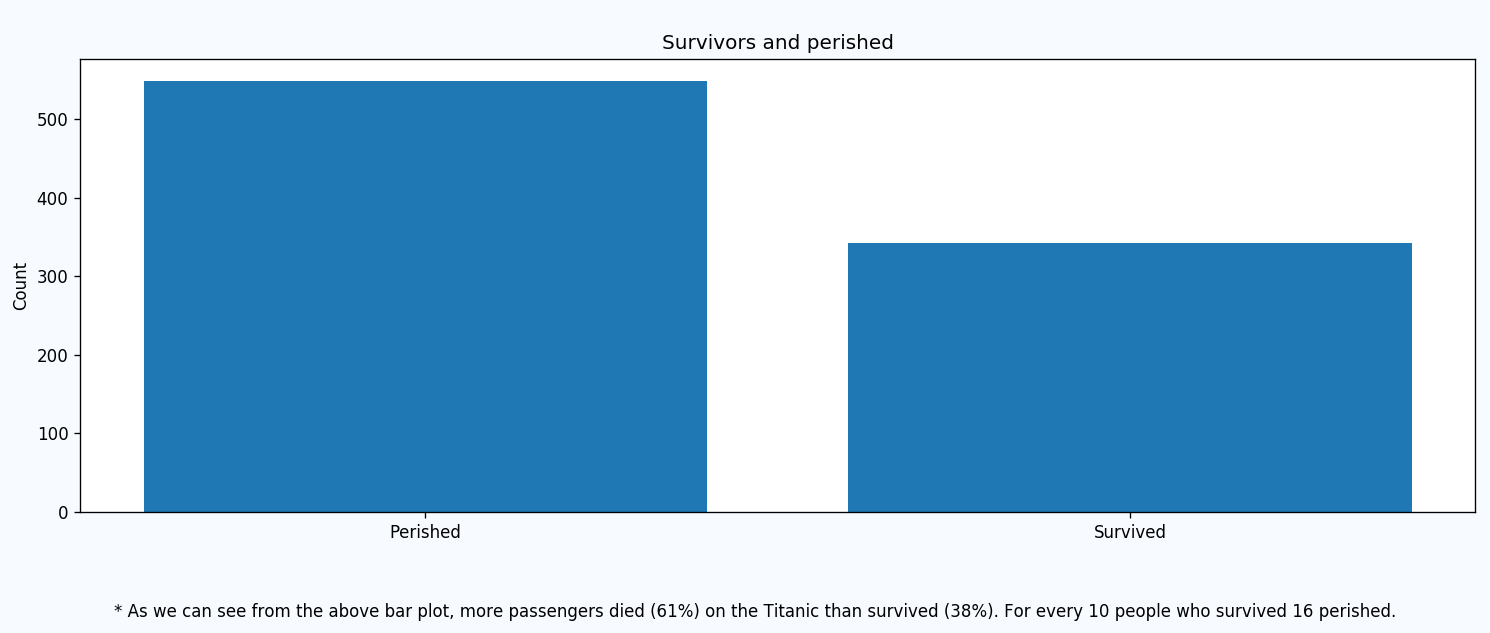

In [30]:
# Number of survivors and perished
print('\nNumber of survivors and perished\n===============================\nSurvived:')
print(statsi['Survived_y_n'].value_counts())
print('\n')

# Number of survivors and perished bar plot
survivors_dist = statsi
survivors_dist_intervals = survivors_dist['Survived']
survivors_dist_count = survivors_dist.groupby(['Survived'])['Age'].count()
survivors_dist_y = np.arange(len(survivors_dist_intervals))

num_bins = 2
indices = np.arange(num_bins)
txt="* As we can see from the above bar plot, more passengers died (61%) on the Titanic than survived (38%). For every 10 people who survived 16 perished."

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', dpi=120)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.text(.5, -0.05, txt, ha='center')

plt.bar(indices, survivors_dist_count)
plt.ylabel("Count")
plt.xticks(indices,('Perished', 'Survived'))
plt.title('\nSurvivors and perished')


plt.show()

## Survivors and perished as percent

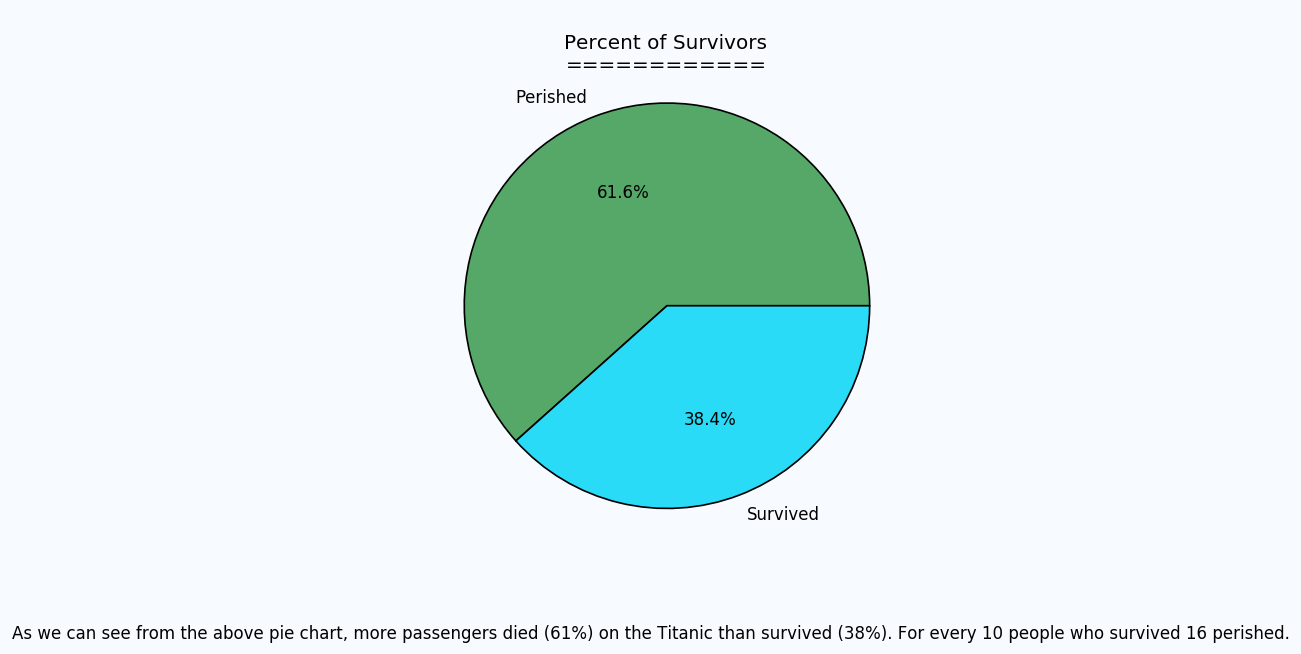

In [31]:
# Set up the plot's figure

txt = 'As we can see from the above pie chart, more passengers died (61%) on the Titanic than survived (38%). For every 10 people who survived 16 perished.'
colors = ['#55a868', '#2adbf7'] # Set the colors for the slices (2 in this case)

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,200), dpi=120)
fig.set_figwidth(10)
fig.set_figheight(5)
fig.text(.5, -0.05, txt, ha='center')

# Plot the percent of survivors
pie_chart = (statsi['Survived'].value_counts()) # Create the array 'x' for the pie chart
plt.pie(pie_chart, shadow=False, colors=colors, autopct='%1.1f%%', labels = ['Perished', 'Survived'],
        wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})# Plot the pie chart
plt.axis('equal')  # make the chart look good (round)
plt.title('\nPercent of Survivors\n============') # Give a title to the plot

plt.show() # Show the plot

[Top](#Top)<br />
[Analysing](#analyzing)


Now, lets break down the numbers and percentages following the 4 variables (Class | Age | Gender | Fare)

<a id='class'></a>
# <center><h1>Survivors by Class</h1></center>
[Top](#Top)

### Which class members' survival rate was the highest?

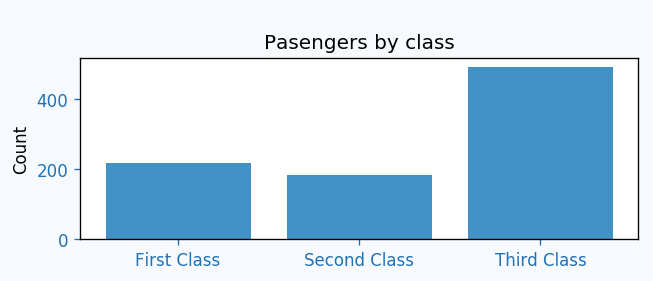

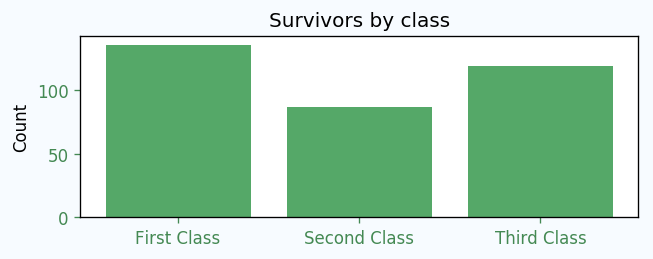

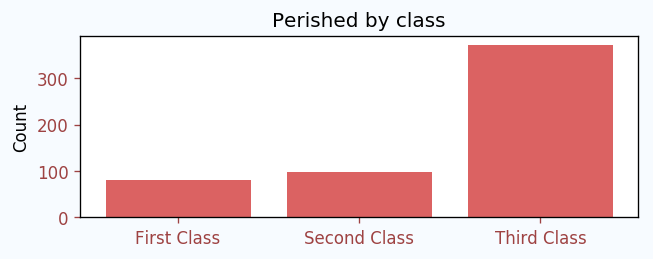

In [32]:
# Plot of passengers by class
passengers_class = statsi
passengers_class_intervals = passengers_class['Class']
passengers_class_count = passengers_class.groupby(['Class'])['Age'].count()
passengers_class_y = np.arange(len(passengers_class_intervals))

num_bins = 3
indices = np.arange(num_bins)

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)
fig.set_figwidth(6)
fig.set_figheight(2)

plt.bar(indices, passengers_class_count, color='#4292c6')
plt.ylabel("Count")
plt.xticks(indices,('First Class', 'Second Class', 'Third Class'))
plt.title('\nPasengers by class')
ax = plt.gca()
ax.tick_params(axis='x', colors='#2171b5')
ax.tick_params(axis='y', colors='#2171b5')
plt.show()

# Plot of survivors by class
survivors_class = survivors
survivors_class_intervals = survivors_class['Class']
survivors_class_count = survivors_class.groupby(['Class'])['Age'].count()
survivors_class_y = np.arange(len(survivors_class_intervals))

fig = plt.figure(facecolor='#f7fbff', edgecolor='#15468c', figsize=(15,5), dpi=120)
fig.set_figwidth(6)
fig.set_figheight(2)

plt.bar(indices, survivors_class_count, color='#55a868')
plt.ylabel("Count")
plt.xticks(indices,('First Class', 'Second Class', 'Third Class'))
plt.title('Survivors by class')
ax = plt.gca()
ax.tick_params(axis='x', colors='#448953')
ax.tick_params(axis='y', colors='#448953')
plt.show()

# Plot of perished by class
perished_class = perished
perished_class_intervals = perished_class['Class']
perished_class_count = perished_class.groupby(['Class'])['Age'].count()
perished_class_y = np.arange(len(perished_class_intervals))

fig = plt.figure(facecolor='#f7fbff', edgecolor='#15468c', figsize=(15,5), dpi=120)
fig.set_figwidth(6)
fig.set_figheight(2)

plt.bar(indices, perished_class_count, color='#db6262')
plt.ylabel("Count")
plt.xticks(indices,('First Class', 'Second Class', 'Third Class'))
plt.title('Perished by class')
ax = plt.gca()
ax.tick_params(axis='x', colors='#9e4242')
ax.tick_params(axis='y', colors='#9e4242')
plt.show()

In [33]:
## Survivors by Class in numbers

In [34]:
# Print related numbers to the Class variable using .value_counts
print('\nNumber of passengers in each class\n==================================\n')
pass_count = statsi['Class'].value_counts(sort=False) # Count passengers
print(pass_count) #Print the count of the passengers


Number of passengers in each class

1    216
2    184
3    491
Name: Class, dtype: int64


In [35]:
# Print the number of survivors as a crosstab
print('\n\nNumber of survivors from each class\n===================================\n')
# Output a pivot-like table crossing data from 2 variables
class_sur = pd.crosstab(statsi.Class, statsi.Survived_y_n, margins=True)
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

class_sur.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['Yes']])



Number of survivors from each class



Survived_y_n,No,Yes,All
Class,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [36]:
# Print crosstab of the percent of survivors by class 
print('\n\nPercent of survivors from within each class\n===========================================\n')
# Crossing data with percent of survivors by class
sur_percent = pd.crosstab(statsi.Class, statsi.Survived_y_n, margins=False, normalize='index')* 100
sur_percent_xrs_tab = sur_percent['Yes']
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

sur_percent.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['Yes']])



Percent of survivors from within each class



Survived_y_n,No,Yes
Class,,
1,37,63
2,53,47
3,76,24


First class passengers had the highest survival rate (63%), while passengers from class 3 had less than 24% chances to survive. Passengers from class 2 had almost 50% chances to survive.
Was it a chance, and could the survival odds flip between the classes in a similar disaster like that?
Let's try to answer this exact question with a statistical test. Since this is a nominal type of data I will use the Chi-Square test:

In [37]:
### Chi-Square test to test the goodness of fit between the survival rate of the 3 classes
print('\nChi-Square Test - Number of survivors by Class\n==============================================\n\n'
     '\nNull Hypothesis:\n''Ho: There is no statistically significant difference between any of the classes\' survival rate.\n'
      'Ha: There is a statistically significant difference in the survival rate between any of the 3 classes of passengers.'
      '\nThe survival rate should be 33.3% for the 3 classes.\n')

# Contingency table of the classes' survival
print('Contingency table of the classes\' survival\n===========================================')
print(pd.crosstab(statsi.Class, statsi.Survived, margins=True))
print('\n')

chi_sq = pd.crosstab(statsi.Class, statsi.Survived, margins=False)
print('The Chi-Square (Goodness of fit), Probability, Degrees of oreedom, and the Expected frequencies\n'
      'Critical Value for the chi square = 5.991\n'
     '==============================================================================')
chi2_contingency(chi_sq)
print('\nThe Chi-Square distribution\'s Critical Value is 5.991')


Chi-Square Test - Number of survivors by Class


Null Hypothesis:
Ho: There is no statistically significant difference between any of the classes' survival rate.
Ha: There is a statistically significant difference in the survival rate between any of the 3 classes of passengers.
The survival rate should be 33.3% for the 3 classes.

Contingency table of the classes' survival
Survived    0    1  All
Class                  
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


The Chi-Square (Goodness of fit), Probability, Degrees of oreedom, and the Expected frequencies
Critical Value for the chi square = 5.991

The Chi-Square distribution's Critical Value is 5.991


* We can see here that the chi-square statistic is 102.888 with 2 degrees of freedom, which is a lot more than the Chi Square Critical Value of 5.991.<br />
The total number of (observed) survivors is 342.<br />
With a critical value of 5.991, the probability (p-value) is smaller than 0.0001, which is considered as extremely statistically significant at p &lt; 0.05.<br />
* It could be interesting to check other disasters across different categories and compare the results with this test, to see whether First class ride improves one's survival rate.<br />
* On the Titanic, Class did affect one's chances of survival.

[Top](#Top)<br />
[Class](#class)

<a id='gender'></a>
# <center><h1>Survivors by Gender</h1></center>
[Top](#Top)

### Which gender had better survival rates?

Let's start with the percent of the survivors and the number of survivors from each gender and compare them with the number of passengers on board after leaving the last port of embarkation.

## Number of survivors

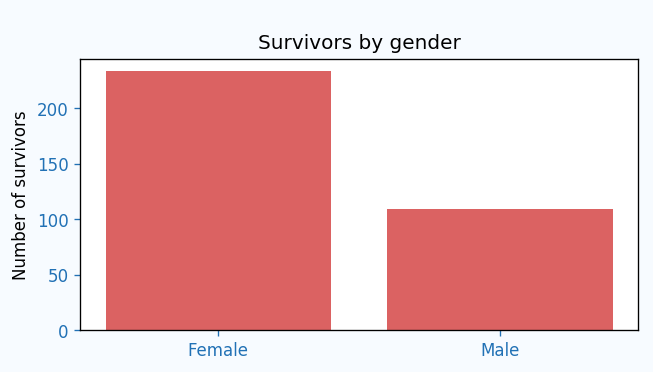

In [38]:
# Plot of survivors by gender

passengers_gender = survivors
passengers_gender_intervals = passengers_gender['Gender']
passengers_gender_count = passengers_gender.groupby(['Gender'])['Age'].count()
passengers_gender_y = np.arange(len(passengers_gender_intervals))

num_bins = 2
indices = np.arange(num_bins)

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)
fig.set_figwidth(6)
fig.set_figheight(3)

plt.bar(indices, passengers_gender_count, color='#db6262')
plt.ylabel("Number of survivors")
plt.xticks(indices,('Female', 'Male'))
plt.title('\nSurvivors by gender')
ax = plt.gca()
ax.tick_params(axis='x', colors='#2171b5')
ax.tick_params(axis='y', colors='#2171b5')
plt.show()

## Survivors by gender in numbers

In [39]:
print('\nNumber of survivors by Gender\n=============================\n')
print(pd.crosstab(survivors.Gender, survivors.Survived, margins=False))
print('\n')


Number of survivors by Gender

Survived    1
Gender       
female    233
male      109




## Survivors by gender in percent

In [40]:
print(pd.crosstab(survivors.Gender, survivors.Survived, margins=False, normalize=True)*100)

Survived      1
Gender         
female    68.13
male      31.87


## Number of males and females on board

In [41]:
# Number of males and females on board
# or use: statsi.groupby(['Gender'])['Survived'].count()
print(statsi.Gender.value_counts())
print('\n')
print('There were 263 more males than females on board\n')

male      577
female    314
Name: Gender, dtype: int64


There were 263 more males than females on board



## Passengers by Gender

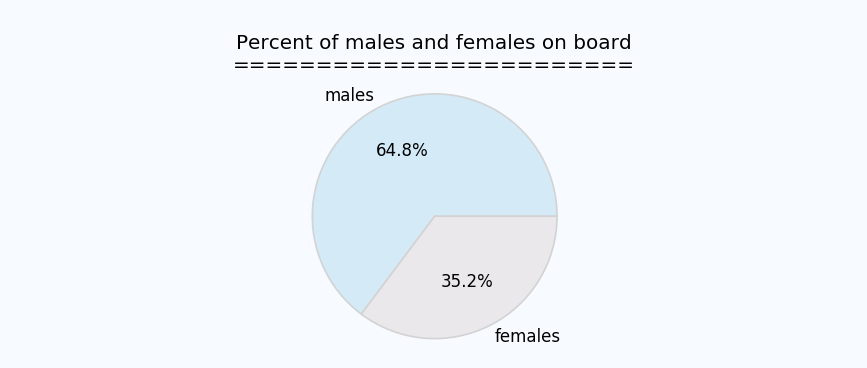

In [42]:
# Pie chart of the survivors and victims in percent
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,200), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)

pie_chart = (statsi['Gender'].value_counts())
colors = ['#d4ebf7', '#eae8ea']
plt.pie(pie_chart, shadow=False, colors=colors, autopct='%1.1f%%', labels = ['males', 'females'],
        wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'})
plt.axis('equal')
plt.title('\nPercent of males and females on board\n========================')
plt.show()

## Survivors by gender

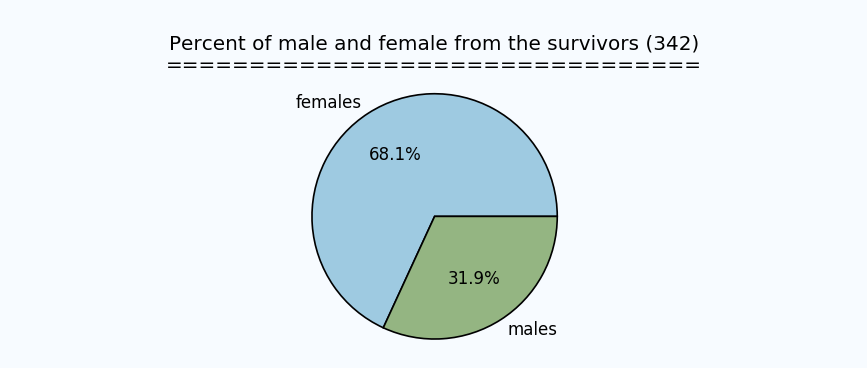

In [43]:
# Pie chart of percent of males and females on board
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,200), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)
sbg = survivors # Create new DF for survivors by gender
pie_chart = (sbg['Gender'].value_counts())
colors = ['#9ecae1', '#94b582']
plt.pie(pie_chart, shadow=False, colors=colors, autopct='%1.1f%%', labels = ['females', 'males'], 
        wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})
plt.axis('equal') 
plt.title('\nPercent of male and female from the survivors (342)\n================================')
plt.show()

We can see that more females than males survived. But is it significant difference or a statistical error?
Before answering this question with a statistical test, let's look at the survival's numbers and percentages of both genders and within each gender:

## Male survival

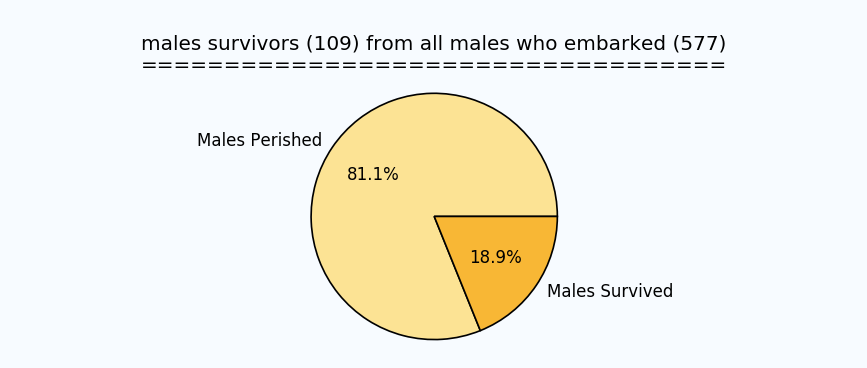


Number of Male survivors

Survived_y_n   No  Yes  All
Gender                     
male          468  109  577
All           468  109  577




In [44]:
# Pie chart of percent of males survived
sbgm = statsi # New dataframe for Male survivors
sbgm = sbgm.loc[sbgm['Gender'] == 'male']
sbgm_chart = sbgm['Survived_y_n'].value_counts(normalize=True) * 100
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,200), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)
colors = ['#fce394', '#f8b735']
plt.pie(sbgm_chart, shadow=False, colors=colors, autopct='%1.1f%%', 
        labels = ['Males Perished', 'Males Survived'], wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})
plt.axis('equal') 
plt.title('\nmales survivors (109) from all males who embarked (577)\n===================================')
plt.show()
# Percent of Male survivors
print('\nNumber of Male survivors\n========================\n')
print(pd.crosstab(sbgm.Gender, sbgm.Survived_y_n, margins=True))
print('\n')

## Female survival

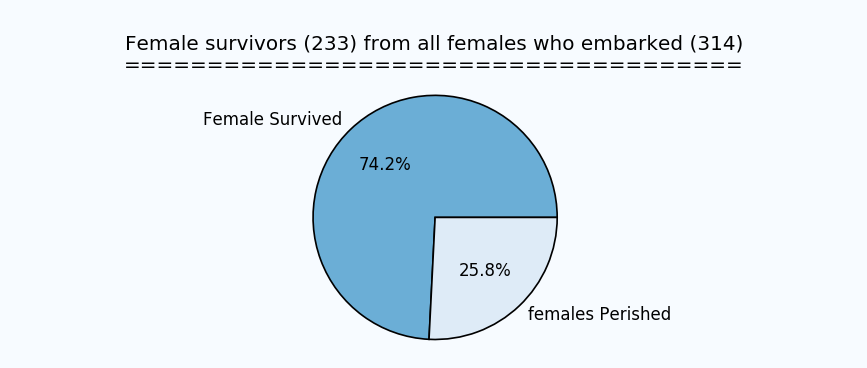


Number of Female survivors

Survived_y_n  No  Yes  All
Gender                    
female        81  233  314
All           81  233  314
Critical Value for the chi square = 3.841



In [45]:
# Pie chart of percent of females survived
sbgf = statsi # New dataframe for Female survivors
sbgf = sbgf.loc[sbgf['Gender'] == 'female']
sbgf_chart = sbgf['Survived_y_n'].value_counts(normalize=True) * 100
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,200), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)
colors = ['#6baed6', '#deebf7']
plt.pie(sbgf_chart, shadow=False, colors=colors, autopct='%1.1f%%', 
        labels = ['Female Survived', 'females Perished'], wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})
plt.axis('equal') 
plt.title('\nFemale survivors (233) from all females who embarked (314)\n=====================================')
plt.show()
# Percent of Male survivors
print('\nNumber of Female survivors\n==========================\n')
print(pd.crosstab(sbgf.Gender, sbgf.Survived_y_n, margins=True))
print('Critical Value for the chi square = 3.841\n')

* 74% of the females who embarked on the first and last trip of the Titanic survived, compared to only 19% of the males.&nbsp;<br />
This shows that females had 4 times better chance to survive on this cruise.<br />
When the Titanic left the last harbor, there were 577 males on the ship (out of 891 passengers), almost twice the number than females (314). Yet, 68% of the total survivors were females (233).<br />
Now, let's check with a statistical test if the difference between the two genders' survival rate is significantly different and is not due to chance.<br />
I will use the chi-Square test here as well:

In [46]:
# Chi-Square test to test the goodness of fit between males and females who survived

print('\nChi-Square Test - Number of survivors by Gender\n=============================\n\n'
      'Null Hypothesis:\n\n'
     'Ho: There is no statistically significant difference between males and females\' survival rate.\n'
     'Ha: There is a statistically significant difference between males and females\' survival rate.')

# Contingency table of males and females survival
print('\n\nContingency table of males and females survival\n===========================================')
print(pd.crosstab(statsi.Gender, statsi.Survived, margins=True))
print('\n')

chi_s = pd.crosstab(statsi.Gender, statsi.Survived, margins=False)
print('\nThe Chi-Square (Goodness of fit), Probability, Degrees of freedom, and the Expected frequencies\n'
     '==============================================================================')
print(chi2_contingency(chi_s))


Chi-Square Test - Number of survivors by Gender

Null Hypothesis:

Ho: There is no statistically significant difference between males and females' survival rate.
Ha: There is a statistically significant difference between males and females' survival rate.


Contingency table of males and females survival
Survived    0    1  All
Gender                 
female     81  233  314
male      468  109  577
All       549  342  891



The Chi-Square (Goodness of fit), Probability, Degrees of freedom, and the Expected frequencies
(260.71702016732104, 1.1973570627755645e-58, 1, array([[ 193.47474747,  120.52525253],
       [ 355.52525253,  221.47474747]]))


The Chi square result is 260 with 1 degree of freedom.<br />
The Chi Square critical value for 95% and 1 degree of freedom is 3.841.
The one-tailed P value is less than 0.0001.<br />
The association between males, females, and survival is considered to be extremely statistically significant.<br />
In other words, females did not survive in such a great proportion by chance. There had to be a cultural code of behavior that said, females first.

[Top](#Top)<br />
[Gender](#gender)

# Gender Survival by Class

### Drag and drop the 'Survived', 'Gender' and Class to the left column.
#### You can change the view to a bar chart and other visualizations under the drop down menu at the left

In [47]:
# Pivot table with the  pivottablejs library
pivot_ui(survivors, outfile_path="titanic_pivot.html")

In [48]:
# The above distribution in numbers
print('Count of survivors by '"'Gender'"', '"'Class'"'\n'
      '=======================================')
print(survivors.groupby(['Class','Gender'])['Survived'].count().unstack())

Count of survivors by 'Gender', 'Class'
Gender  female  male
Class               
1           91    45
2           70    17
3           72    47


In [49]:
# Find the percent of survival by gender and class

print('Survivors by Class and Gender')
gender_by_class = survivors.groupby(['Class','Gender'])['Survived'].count().unstack()
gender_by_class['sum'] = gender_by_class['female'] + gender_by_class['male']
gender_by_class['percent male'] = 100 * (gender_by_class['male'] / gender_by_class['sum'])
gender_by_class['percent female'] = 100 * (gender_by_class['female'] / gender_by_class['sum'])

def highlight_vals(val, color='Yellow'): # Highlight sells in the table
    if val >= 1:
        return 'background-color: %s' % color
    else:
        return ''

gender_by_class.style.applymap(highlight_vals, subset=['percent female'])

Survivors by Class and Gender


Gender,female,male,sum,percent male,percent female
Class,,,,,
1,91,45,136,33,67
2,70,17,87,20,80
3,72,47,119,39,61


Looking at the above plot and table we can see that men from first class perished 3 times more than women. The second class had the worse ratio with 5 men perished for every woman and in the third class man perished in ration of 2.5 men to 1 woman.
Women in second class had the best survival rate of 80%, compare to only 20% men from the same class.

<a id='age'></a>
# <center><h1>Survivors by Age</h1></center>
[Top](#Top)

### Passengers in which group age had the best chances of survival?

## Age variable basic statistics

In [50]:
# Ages basic details and statistics
statsi['Age'].astype(int).round().describe()


count    891.00
mean      40.55
std       23.24
min        0.00
25%       21.00
50%       41.00
75%       61.00
max       79.00
Name: Age, dtype: float64

### We will start with a simple histogram of the distribution of survivors by age:

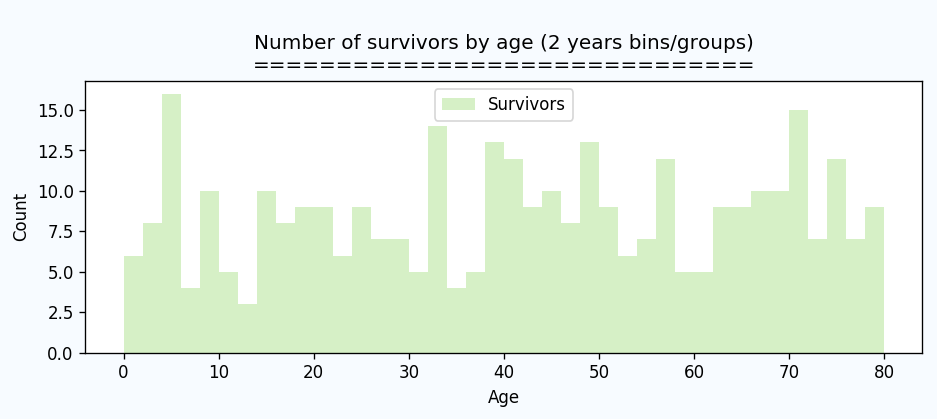

In [51]:
# Histograms of the survivors' ages distribution

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)

plt.hist(survivors['Age'], bins = 40, range = (0, 80), alpha = 0.8, color = "#ccedb8", label = 'Survivors')

plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title('\nNumber of survivors by age (2 years bins/groups)\n==============================')
plt.show()

### Now let's compare the survivors'  ages and the entire population (all passengers, survivors and perished)

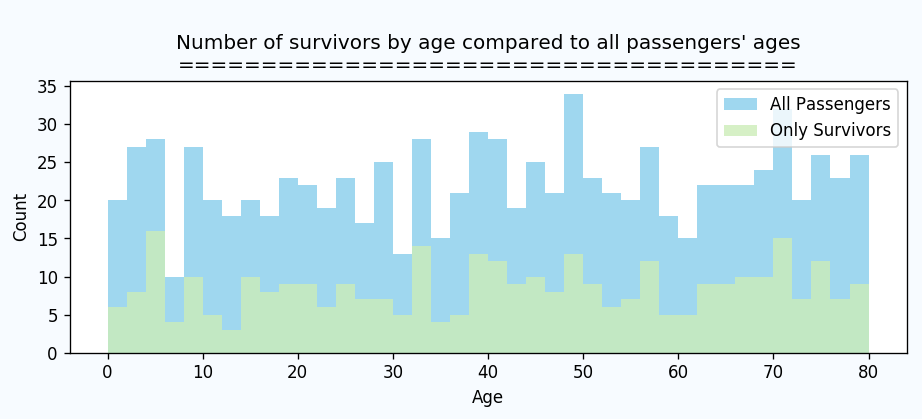

In [52]:
# Compare the age of survivors and the age of all passengers
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)
plt.hist(statsi['Age'], bins = 40, range = (0, 80), alpha = 0.8, label='All Passengers', color = "skyblue")
plt.hist(survivors['Age'], bins = 40, range = (0, 80), alpha = 0.8, color = "#ccedb8", label='Only Survivors')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title('\nNumber of survivors by age compared to all passengers\' ages\n=====================================')
plt.show()

### Adjusting both Survivors and All Passengers' values to the same scale for comparison

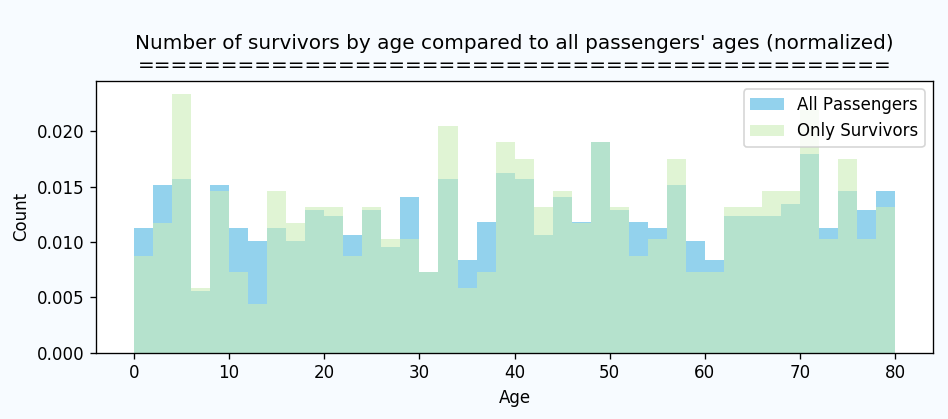

In [53]:
# Plot histograms of the normalized distributions for the 2 columns above
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)

plt.hist(statsi['Age'], normed=1, bins = 40, range = (0, 80), alpha = 0.9, label='All Passengers', color = "skyblue")
plt.hist(survivors['Age'], normed=1, bins = 40, range = (0, 80), alpha = 0.6, color = "#ccedb8", label='Only Survivors')

plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title('\nNumber of survivors by age compared to all passengers\' ages (normalized)\n=============================================')
plt.show()

* We can see from the above 3 histograms that passengers and survivors distributions have more or less the same shape. From the 3rd (normalized) distribution of both datasets, we can see that there is some symmetry between the 2 distributions. This might suggest that the age groups with most passengers had most of the survivors and groups with less members had less survivors.<br />
We can also see that there is a wide gap between the number of passengers and the number of survivors (when it is not normalized). This says that there were more people who died than survived across the board of ages. <br /><br />
Let’s try to dig in and see if this is really the case or not using the Pandas' function .cut() from the top of this document.<br />
This function creates ranges of ages by decades, up to 80, thus 8 age groups.<br />
First, let's examine how the distribution of this new column looks like:

# Survivors by age groups

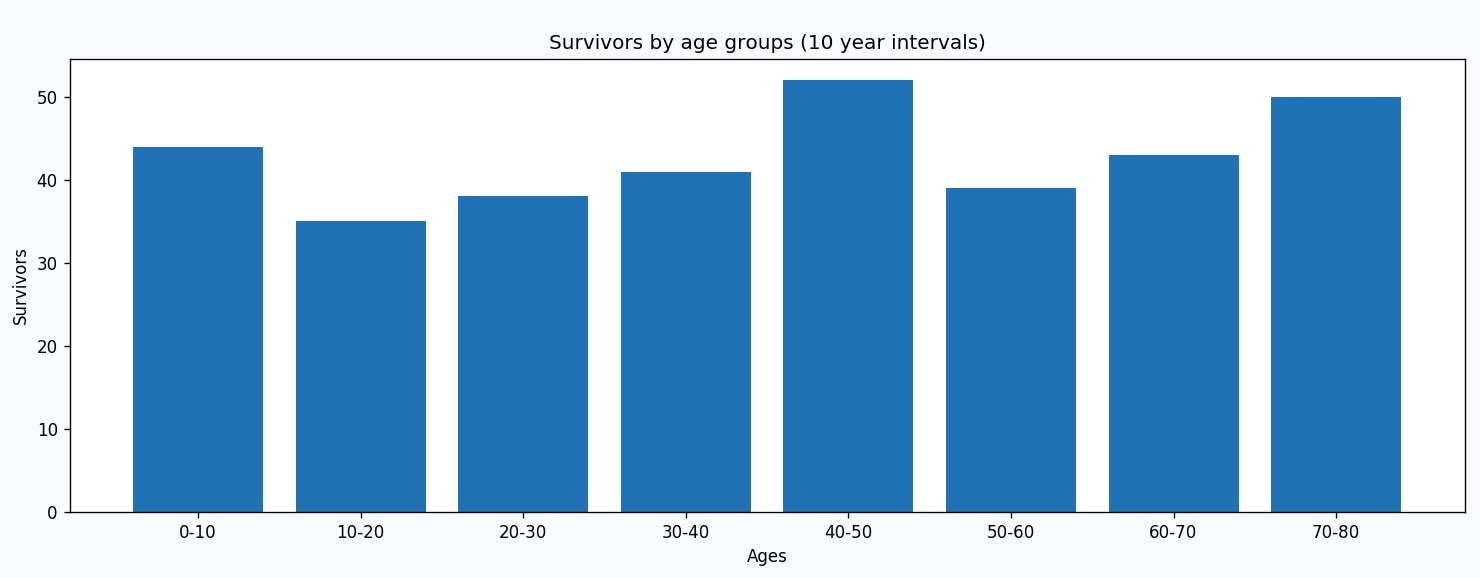

In [54]:
# Number of passengers who survived from each age group

surv_by_ages = survivors
surv_by_ages_intervals = surv_by_ages['Ages']
surv_by_ages_count = surv_by_ages.groupby(['Ages'])['Survived'].count()
surv_by_ages_y = np.arange(len(surv_by_ages_intervals))

num_bins = 8
indices = np.arange(num_bins)

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)

plt.bar(indices, surv_by_ages_count, color='#2171b5')
plt.xlabel("Ages")
plt.ylabel("Survivors")
plt.xticks(indices,('0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'))
plt.title('\nSurvivors by age groups (10 year intervals)')

plt.show()

In [55]:
surv_by_ages_intervals.unique()


[0-10, 20-30, 10-20, 40-50, 70-80, 30-40, 50-60, 60-70]
Categories (8, object): [0-10 < 10-20 < 20-30 < 30-40 < 40-50 < 50-60 < 60-70 < 70-80]

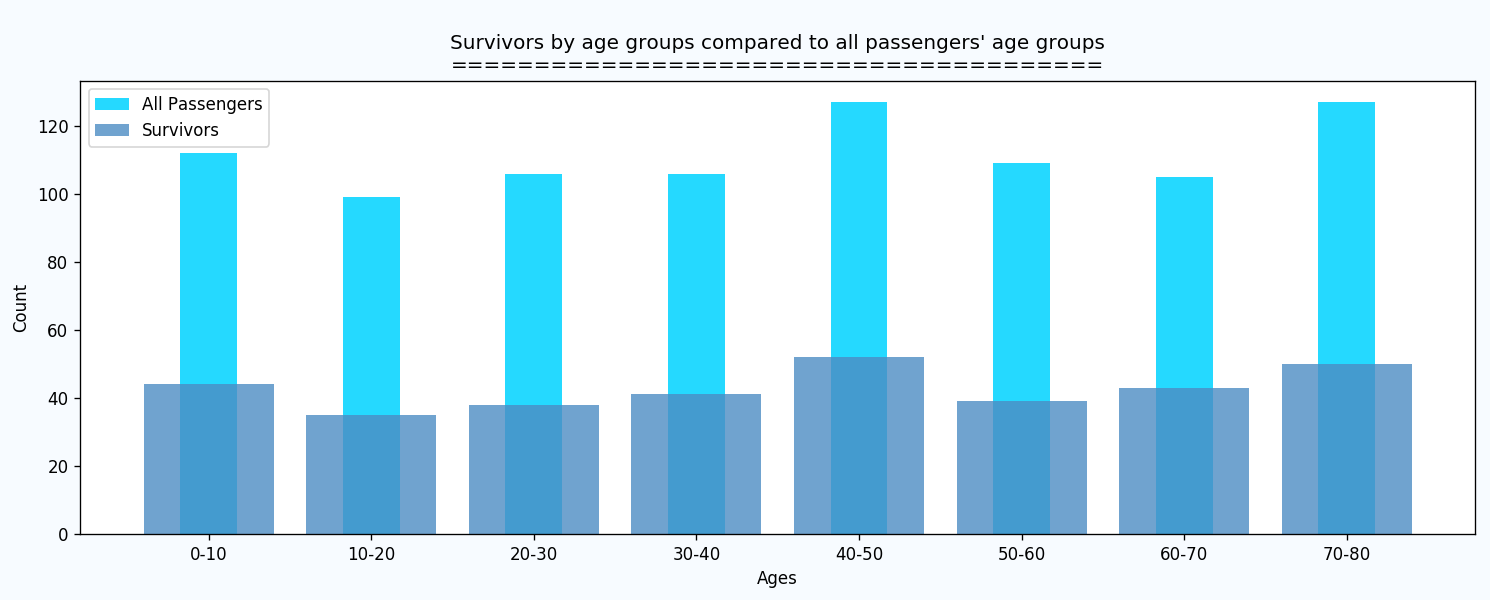

In [56]:
# Compare number of survivors by group ages to the entire population of passengers
passengers_by_ages = statsi
passengers_by_ages_intervals = passengers_by_ages['Ages']
passengers_by_ages_count = passengers_by_ages.groupby(['Ages'])['Survived'].count()
passengers_by_ages_y = np.arange(len(passengers_by_ages_intervals))
num_bins = 8
indices = np.arange(num_bins)
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', dpi=120)
fig.set_figwidth(15)
fig.set_figheight(5)
width = 0.35
plt.bar(indices, passengers_by_ages_count, color='#25d9ff', label='All Passengers', width=width)
plt.bar(indices, surv_by_ages_count, color='#4C8CC3', label='Survivors', alpha = 0.8)
plt.xlabel("Ages")
plt.ylabel("Count")
plt.xticks(indices,('0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'))
plt.title('\nSurvivors by age groups compared to all passengers\' age groups'
         '\n=======================================')
plt.legend()
plt.show()

## Survivors by age groups in numbers

In [57]:
# What is the number of survivors from within each group age?
surv_by_ages_num = survivors
surv_by_ages_num.groupby(['Ages'])['Survived'].count().sort_values()

Ages
10-20    35
20-30    38
50-60    39
30-40    41
60-70    43
0-10     44
70-80    50
40-50    52
Name: Survived, dtype: int64

* After dividing the Age variable into ranges of 10 years, we can see that there are no exceptional outliers or trends. The distribution seems random. The largest age groups of survivors are the 10s and the 40s. But being the group that had the highest number of survivors does not mean necessarily that the chances were better than other age groups' members.
<br />
The groups of 40-50 and 0-10 have the highest number of survivors. But which group members had the best chances of survival within those groups? To find that out I will find the age group's percent of survival from the total number of passengers (both survived and perished) in the specific group.

## Percents of survival from within each group age

In [58]:
# What is the percent of survival from within each group age?
def highlight_vals(val, color='Yellow'): # Highlight sells in the table
    if val > 0:
        return 'background-color: %s' % color
    else:
        return 'None'
group_ages_surv_per = statsi
group_ages_surv_per['Survival'] = group_ages_surv_per['Survived']
group_ages_surv_per = group_ages_surv_per[['Survived', 'Ages', 'Gender', 'Survival']]
group_ages_surv_per = pd.crosstab(group_ages_surv_per.Ages, group_ages_surv_per.Survived,  margins=False)
group_ages_surv_per['total'] = group_ages_surv_per[0]+group_ages_surv_per[1]
group_ages_surv_per['Percent Survival'] = group_ages_surv_per[1] / group_ages_surv_per['total'] * 100
group_ages_surv_per['Normalized'] = group_ages_surv_per[1] / group_ages_surv_per['total']
group_ages_surv_per = group_ages_surv_per.sort_values('Percent Survival', ascending=False)
group_ages_surv_per.style.applymap(highlight_vals, subset=['Percent Survival'])

Survived,0,1,total,Percent Survival,Normalized
Ages,,,,,
60-70,62,43,105,41,0.41
40-50,75,52,127,41,0.41
70-80,77,50,127,39,0.39
0-10,68,44,112,39,0.39
30-40,65,41,106,39,0.39
20-30,68,38,106,36,0.36
50-60,70,39,109,36,0.36
10-20,64,35,99,35,0.35


* From the crosstab table above we can see that the group age with the highest survival rate of 46% was the seniors' one (70-80) and the one with the lowest survival rate was the 10-20 group with only 33% survival rate.<br />
We can see that the percentages of survivors from within each group varied, at most, in 13%. This doesn't seem odd and look more like a random distribution.
Maybe, dividing the passengers' ages by different key will make things look different. Let's try and classify children as ones who are 14 years and younger; Adults from 15 to 60 and seniors from 60 and up and see if there is a meaningful difference in their survival rate: 


## Changing the age variable to 3 age groups

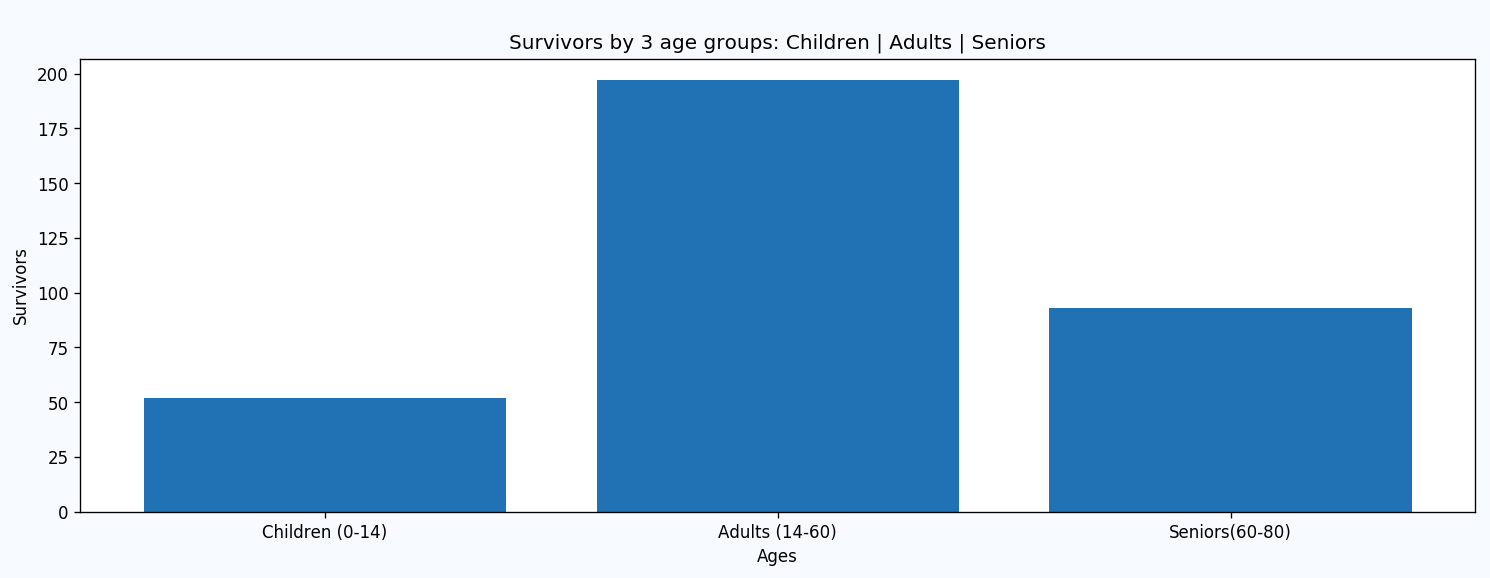

In [59]:
# Breaking down the ages to 3 different groups (Children, adults and seniors)

# Plot of the survivors by those 3 groups:
chi_adt_senior_sur_ages = survivors
chi_adt_senior_sur_ages = chi_adt_senior_sur_ages[chi_adt_senior_sur_ages['Survived'] == 1]
chi_adt_senior_sur_ages['Ages-1'] = pd.cut(chi_adt_senior_sur_ages['Age'], bins=[0, 14, 60, 80], 
                                            labels=["1","2","3"])
chi_adt_senior_sur_ages_intervals = chi_adt_senior_sur_ages['Ages-1']
chi_adt_senior_sur_ages_count = chi_adt_senior_sur_ages.groupby(['Ages-1'])['Survived'].count()
chi_adt_senior_sur_ages_y = np.arange(len(chi_adt_senior_sur_ages_intervals))
num_bins = 3
indices = np.arange(num_bins)
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)
plt.bar(indices, chi_adt_senior_sur_ages_count, color='#2171b5')
plt.xlabel("Ages")
plt.ylabel("Survivors")
plt.xticks(indices,('Children (0-14)','Adults (14-60)','Seniors(60-80)'))
plt.title('\nSurvivors by 3 age groups: Children | Adults | Seniors')
plt.show()

### Drag and drop the 'Survived', 'Gender' and Class to the left column.
#### You can change the view to a bar chart and other visualizations under the drop down menu at the left

In [60]:
pivot_ui(chi_adt_senior_sur_ages)

In [61]:
# What is the percent of survival from within each of the 3 new age groups?
print('\nPercent of survivors from within each group age\n===============================================')

group_ages1_surv_per = statsi
group_ages1_surv_per = group_ages1_surv_per.loc[:,('Survived', 'Gender', 'Age', 'Survival')]
group_ages1_surv_per['Survival'] = group_ages1_surv_per['Survived']

#group_ages1_surv_per = group_ages1_surv_per[group_ages1_surv_per['Survived'] == 1]
group_ages1_surv_per['Ages-1'] = pd.cut(group_ages1_surv_per['Age'], bins=[0, 14, 60, 80], labels=["Child","Adult","Senior"])
group_ages1_surv_per = pd.crosstab(group_ages1_surv_per['Ages-1'], group_ages1_surv_per['Survived'],  margins=False)
group_ages1_surv_per['total'] = group_ages1_surv_per[0]+group_ages1_surv_per[1]
group_ages1_surv_per['Percent Survival'] = group_ages1_surv_per[1] / group_ages1_surv_per['total'] * 100
group_ages1_surv_per['Normalized'] = group_ages1_surv_per[1] / group_ages1_surv_per['total']
group_ages1_surv_per = group_ages1_surv_per.sort_values('Percent Survival', ascending=False)
group_ages1_surv_per.style.applymap(highlight_vals, subset=['Percent Survival'])


Percent of survivors from within each group age


Survived,0,1,total,Percent Survival,Normalized
Ages-1,,,,,
Senior,139,93,232,40,0.4
Adult,312,197,509,39,0.39
Child,98,52,150,35,0.35


* We can see that there is about 10% difference between the survival rate of the adults and the two other age groups.<br />
Children in this analysis are considered to be 14 years and younger.<br />
If we were to change the max age of children to 18 it seems that will not make a significant difference in the Children's survival rate (39% survival rate instead of 42%).

[Top](#Top)<br />
[Age](#age)


<a id='fare'></a>
# <center><h1>Survivors by Fare</h1></center>
[Top](#Top)

### First, checking the distribution of all the tickets that were sold:

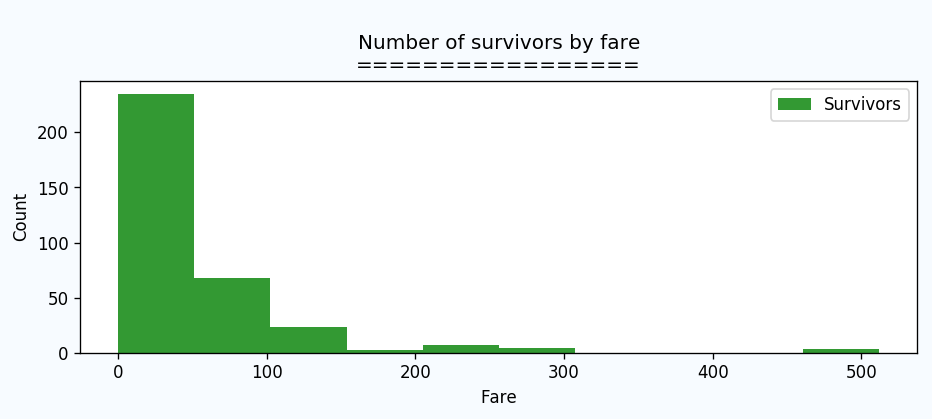

In [62]:
# Histograms of the survivors' ages distribution

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(15,5), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)

plt.hist(survivors['Fare'], alpha = 0.8, color = "#008000", label = 'Survivors')

plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend()
plt.title('\nNumber of survivors by fare\n=================')
plt.show()

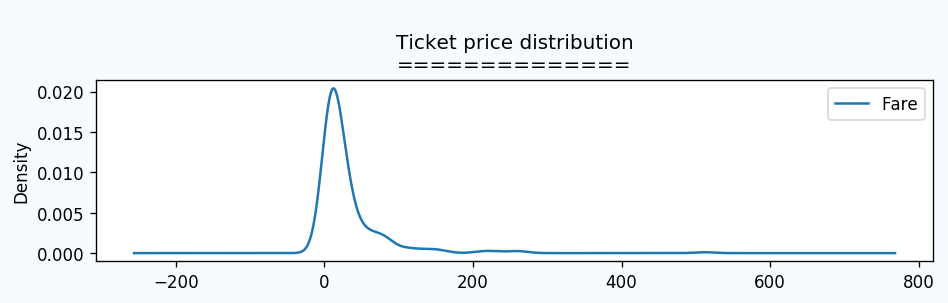

In [63]:
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,200), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(2)

statsi['Fare'].plot(kind='density', legend=True)
plt.title('\nTicket price distribution\n==============')
plt.show()

From the above plots, we see that most of the passengers paid anywhere between 0 and ~\$50 for a ticket. Also, we can see bumps in the \$200s and \$500s ticket prices. Let's take a closer look at those numbers:

In [64]:
# Ticket(Fare) column basic statistics
print('Basic statistics for the \'Fare\' variavle')
print(statsi['Fare'].describe())

Basic statistics for the 'Fare' variavle
count    891.00
mean      31.79
std       49.70
min        0.00
25%        7.00
50%       14.00
75%       31.00
max      512.00
Name: Fare, dtype: float64


It seems that there is a huge difference between the max and the average prices of tickets. The standard deviation is bigger than the mean. There must be outliers, let's check if we can find them with a boxplot:

## Outliers who paid more than $151 for their ticket

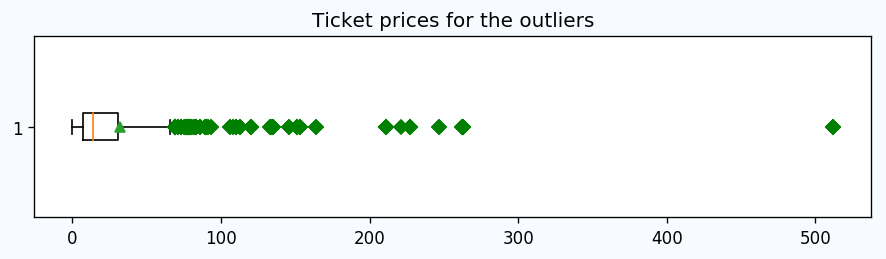

In [65]:
# Boxplot with outliers
data = statsi['Fare']

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,200), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(2)

plt.boxplot(data, 0, 'gD', showmeans=True, vert=False)
plt.title('Ticket prices for the outliers')
plt.show()

Most of the x axis above (showing the distribution of the ticket prices) is populated by outliers (in green). 
Next is a table with only the records of passengers who paid more than $151, which are the outliers.

In [66]:
# Who are the outliers?
# Keep only the ones that are within +3 standard deviations in the Fare column
# Any price higher than $151 (+3 standard deviations) is considered an outlier

outliers = statsi # Create a new dataframe only for outliers
outliers['Fare'] = outliers['Fare'].astype(int) # Change the Fare column to integer
outliers = outliers[outliers['Fare'] >= outliers['Fare'].std()*3] # Include in the dataframe only passengers who
# paid more than 3 standard deviations above the mean, which is $151.

print('Outliers\' Fare variable numbers and basic statistics\n====================================================')
print(outliers['Fare'].describe())

print('\nOutliers - Ticket price and the number of people who purchases in this price\n========================'
      '====================================================')
outliers['Fare'].count() # Number of outliers is 29 out of 891 passengers
print(outliers['Fare'].value_counts().sort_values())

print('\nSurvival rate for the outliers\n==============================')
print(outliers['Survived_y_n'].value_counts(normalize=True) )

print('\nNumber of Outliers who survived\n===============================')
print(outliers['Survived_y_n'].value_counts() )

Outliers' Fare variable numbers and basic statistics
count     29.00
mean     240.34
std      102.73
min      151.00
25%      164.00
50%      227.00
75%      262.00
max      512.00
Name: Fare, dtype: float64

Outliers - Ticket price and the number of people who purchases in this price
221    1
247    2
262    2
164    2
153    3
512    3
211    4
263    4
227    4
151    4
Name: Fare, dtype: int64

Survival rate for the outliers
Yes    0.69
No     0.31
Name: Survived_y_n, dtype: float64

Number of Outliers who survived
Yes    20
No      9
Name: Survived_y_n, dtype: int64


Breaking down the numbers in the Fare variable, 69 percent of the passengers who paid more than 151 dollars for their ticket survived! In numbers, it is 20 passengers who survived and 9 who did not.<br />
<br />
Also, the group that stands out most is the 512 dollars one: 3 passengers paid this sum of money, which is 128 times more expensive than the lowest price ticket ($4) and 16 times more than the median price.<br />
<br />
Did those 3 passengers survive?

In [67]:
# 3 Top Outliers survivors

# Create and print a new DF with only the passengers who paid $512
print('Top 3 most expensive ticket holders survival:')
top_outliers = outliers
top_outliers = top_outliers[top_outliers['Fare'] == 512]
top_outliers.style.applymap(highlight_vals, subset=['Survived'])

Top 3 most expensive ticket holders survival:


,Survived,Class,Gender,Age,Fare,Sex,Survived_y_n,Ages,Survival
258,1,1,female,38,512,1,Yes,30-40,1
679,1,1,male,9.6,512,0,Yes,0-10,1
737,1,1,male,9.2,512,0,Yes,0-10,1


It seems that all 3 passengers, who were in their 30s, in first class and paid \$512, survived. This is 100% survival. Nevertheless, this doesn't mean that there is a dependency between the ticket price and survival since there are only 3 items in this sample.

What about the rest of the passengers whose ticket price was more than 3 standard deviations above the average price? did their survival rate remain the same as the 'top-outliers' (100%)?

As it shows above under 'Survival rate for the outliers', 69% of the Outliers who paid more than $151 for a ticket survived. This is a higher rate than the rate of survivors in general (38%), and higher than the survival rate of females (65% from all survivors) and even higher than all survivors from the first class (63%) on board.

## All outliers survivors

In [68]:
# Only Outliers survivors
outliers_survivors = outliers
outliers_survivors = outliers_survivors[outliers_survivors['Survived_y_n'] == 'Yes']

# Outliers Gender survival
print('\n')
print('Outliers number of survivors by gender\n======================================')
print(outliers_survivors['Gender'].value_counts())

# Outliers percent of survivors by gender
print('\n')
print('Outliers percent of survivors by gender\n=======================================')
print(outliers_survivors['Gender'].value_counts(normalize=True))



Outliers number of survivors by gender
female    17
male       3
Name: Gender, dtype: int64


Outliers percent of survivors by gender
female    0.85
male      0.15
Name: Gender, dtype: float64


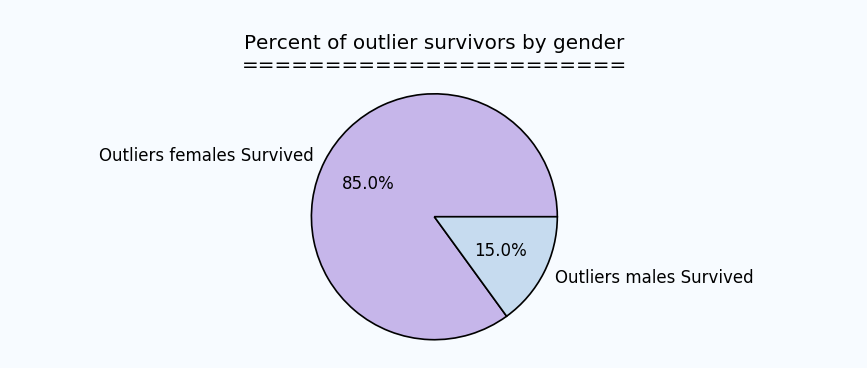

In [69]:
outlier_fem_sur = outliers_survivors['Gender'].value_counts(normalize=True) * 100

# Plot of outlier’s percent of survivors by gender
fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,300), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(3)

colors = ['#c6b6ea', '#c6dbef']
plt.pie(outlier_fem_sur, shadow=False, colors=colors, autopct='%1.1f%%',
        labels = ['Outliers females Survived', 'Outliers males Survived'], 
        wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'black'})
plt.axis('equal') 
plt.title('\nPercent of outlier survivors by gender\n=======================')
plt.show()

85% of all survivors who paid more than $151 for their ticket were females. 



## Correlation between Fare and Age

In [70]:
# Checking the correlation between the Fare and Age variables (From Udacity class)

def correlation(var1, var2):
    both_above = (var1 > var1.mean()) & \
                 (var2  > var2.mean())
    both_below = (var1 < var1.mean()) & \
                 (var2 < var2.mean())
    is_same_direction = both_above | both_below # Both above OR below the mean
    num_same_direction = is_same_direction.sum()
    
    num_different_direction = len(var1) - num_same_direction
    return(num_same_direction, num_different_direction)


print('Correlation between Fare and Age\n================================')
print(correlation(statsi['Fare'], statsi['Age']))

Correlation between Fare and Age
(451, 440)


* The 2 numbers above indicate a poor correlation between the two variables.

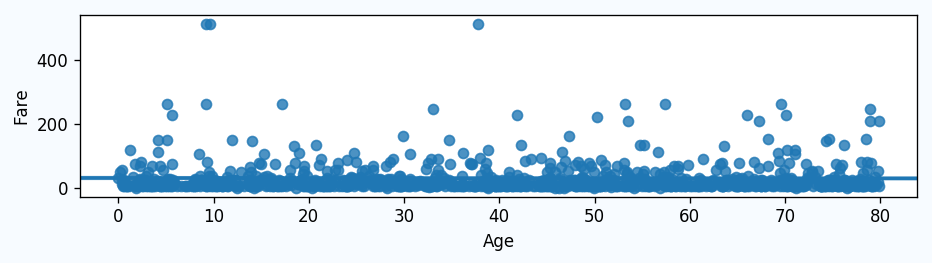

In [71]:
# If using the Seaborn library, we can scratch a regression line for this relationship between ticket price and the age:
# The Seaborn plot here brings the Regression Line, Confidence Interval of 95%

fig = plt.figure(facecolor='#f7fbff', edgecolor='#08306b', figsize=(400,300), dpi=120)
fig.set_figwidth(9)
fig.set_figheight(2)
sns.regplot(x="Age", y="Fare", data=statsi)

* This graph shows the regression line almost flat (almost 0), which means that there is no correlation between those 2 variables. The price of the ticket was not dependent on the age of the passenger. Some young passengers in their 20s paid as much as older people in their 70s.

## Correlation between Fare and Class

In [72]:
# Is there a correlation between the fare and the class passengers were in?
# We'll check this using the above function and just change the Age variable with the Class variable.
print('Correlation between Fare and Class\n================================')
print(correlation(statsi['Fare'], statsi['Class']))

Correlation between Fare and Class
(249, 642)


* We can see a much stronger correlation between the fare passengers paid and the class they were in, than with the Age they were.

[Top](#Top)<br />
[Fare](#fare)

<a id='conclusion'></a>
# <center><h1>Summary</h1></center>
[Top](#Top)

## Discussion

\* This project does not include the crew members on board and their survival statistics. The scope of this analysis is limited to the passengers only.

The luxury steamship RMS Titanic sank in the North Atlantic Ocean in the early morning hours of 15 April 1912 while carrying 891 passengers (577 males and 314 females). Passengers were divided to 3 different Classes, where third class composed the majority of passengers (more than 50% were from the third class (491 compare to 400 from both first and second classes)).
The Titanic passengers, who's ages ranged from less than 1 year to almost 80, paid anywhere between $512 per ticket to not paying at all.<br />
Important to note that the original dataset was missing 177 records of the Age variable. Random numbers were introduced instead of the empty cells in the dataset in order to be able to do calculations that included the Age of passengers. 

From 981 passengers 342 survived and 549 did not. This is about 40% of the population on the Titanic that survived. For every 10 people who survived 16 perished.

Taking into consideration the above analysis and given data, females survival from the entire population was almost twice as that of males (65%/35%). Moreover, females' survival rate from only women passengers was 74% compare to only 18% for men. Being a woman, one had 4 times more chance to survive on the Titanic in its first and only voyage.

First Class passengers survived disproportionally to their number from the population. They had 63% survival rate compare to 47% for Second Class and 24% for Third Class. Clearly being a First Class member gave one a better chance to survive. In Second Class the difference in survival rate was 4 times in favor of women (70/17). And in Third Class women survived 1.6 more times than men (72/47).
By the numbers of gender survival and class we can see that women survived more than men in all classes. The highest rate of survival for women by class was for the ones in the second class with 80%, follwed by 67% for the first class and 61% for the third class. Class seem to did not matter as much as gender for survival. Unless the difference is not statistically significant different, which will be interesting to check with a statistical test. 

There were 29 passengers who bought a significantly more expensive ticket than the rest of the passengers for more than 151 dollars and with average of 240 dollars per ticket. Maximum price of ticket purchased was 512 dollars. The survival rate of this group was 69% men and women together, which are 20 survivors out of 29. From those 20 (probably rich) survivors 85% were women.

Analyzing the age groups, it doesn't seem to be that age affects someone survival rate significantly. A statistical test should be done to prove this last point.

\* Conclusion:
So, who had the best chances to survive? Females on the Titanic had the best chance to survive, eapecially ones in Scond Class. The chance for women will increase to 85% if one pays more than 151 dollars for the ticket.


\* Further interesting analysis:
Did young females have better chances to survive than young males?
Did males and females paid the same amount for their tickets?

[Top](#Top)

[Summary](#Summary)

<a id='sources'></a>
# <center><h1>Sources</h1></center>
[Top](#Top)

Page Name | URL

* Udacity Nano degree Pandas Series (and many other Udacity's course materials that are not cited here) https://classroom.udacity.com/nanodegrees/nd002/parts/0021345403/modules/317671873575460/lessons/5435548805/concepts/54301490320923
* Visualizing the distribution of a dataset http://seaborn.pydata.org/tutorial/distributions.html

* Pandas options and settings http://pandas.pydata.org/pandas-docs/stable/options.html

* pandas.DataFrame.round http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html

* How to make a pandas crosstab with percentAges? http://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentAges

* Pandas: add crosstab totals http://stackoverflow.com/questions/26932682/pandas-add-crosstab-totals

* color example code: named_colors.py http://matplotlib.org/2.0.0b4/examples/color/named_colors.html

* Pandas - replacing column values http://stackoverflow.com/questions/31888871/pandas-replacing-column-values

* Pandas: Replacing column values in dataframe http://stackoverflow.com/questions/23307301/pandas-replacing-column-values-in-dataframe
* How To Convert Data Types in Python 3 https://www.digitalocean.com/community/tutorials/how-to-convert-data-types-in-python-3
* Setting the Title, Legend Entries, and Axis Titles in matplotlib https://plot.ly/matplotlib/figure-labels/

* count the frequency that a value occurs in a dataframe column http://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

* Working with missing data http://pandas.pydata.org/pandas-docs/stable/missing_data.html

* pandas.DataFrame.dropna http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

* Count of unique value in column pandas http://stackoverflow.com/questions/41665659/count-of-unique-value-in-column-pandas

* Create a Column Based on a Conditional in pandas https://chrisalbon.com/python/pandas_create_column_using_conditional.html

* Basic Data Plotting with Matplotlib Part 3: Histograms https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/

* seaborn.FacetGrid http://seaborn.pydata.org/generated/seaborn.FacetGrid.html

* seaborn.factorplot http://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot

* pandas.Series.value_counts http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

* Plotting multiple different plots in one figure using Seaborn http://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn

* Resizing matplotlib figure with set_fig(width/height) doesn't work http://stackoverflow.com/questions/31841289/resizing-matplotlib-figure-with-set-figwidth-height-doesnt-work

* Pandas error - invalid value encountered http://stackoverflow.com/questions/30519487/pandas-error-invalid-value-encountered

* How do I use matplotlib autopct? http://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

* How to normalize index http://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages

* Random row selection in Pandas dataframe http://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe

* Matplotlib screenshots https://matplotlib.org/users/screenshots.html
* Smooth histogram from data in column in Pandas DataFrame? http://stackoverflow.com/questions/35590727/smooth-histogram-from-data-in-column-in-pandas-dataframe

* Find the unique values in a column and then sort them http://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them

* pylab_examples example code: boxplot_demo.py https://matplotlib.org/examples/pylab_examples/boxplot_demo.html

* Matplotlib boxplot without outliers https://stackoverflow.com/questions/22028064/matplotlib-boxplot-without-outliers

* Pandas HTML Output Conditional Formatting - Highlight cell if value in range https://stackoverflow.com/questions/37638402/pandas-html-output-conditional-formatting-highlight-cell-if-value-in-range

* 'Could not interpret input' error with Seaborn when plotting groupbys https://stackoverflow.com/questions/32908315/could-not-interpret-input-error-with-seaborn-when-plotting-groupbys

* Udacity x^2 test https://classroom.udacity.com/courses/ud201/lessons/1331738563/concepts/1895400230923

* How to Include image or picture in jupyter notebook https://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook

* Better Plotting In Python With Seaborn https://robinsones.github.io/Better-Plotting-in-Python-with-Seaborn/

* How to reference a IPython notebook cell in markdown? https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

[Top](#Top)<br />
[Sources](#sources)

Navigate back to: <br />
9.  [Sources](#sources)<br />
8.  [Summary](#Summary)<br />
7.  [Fare](#fare)<br />
6.  [Age](#age)<br />
5.  [Gender](#gender)<br />
4.  [Class](#class)<br />
3.  [Analyzing the data](#analyzing)<br />
2.  [Discovering the data](#discovering)<br />
1.  [Top](#Top)